In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
%matplotlib widget

pd.set_option("display.max_columns", None)

In [52]:
df = pd.read_excel("../../data/raw/drug_consumption.xls")

In [53]:
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1885 non-null   int64  
 1   Age        1885 non-null   float64
 2   Gender     1885 non-null   float64
 3   Education  1885 non-null   float64
 4   Country    1885 non-null   float64
 5   Ethnicity  1885 non-null   float64
 6   Nscore     1885 non-null   float64
 7   Escore     1885 non-null   float64
 8   Oscore     1885 non-null   float64
 9   Ascore     1885 non-null   float64
 10  Cscore     1885 non-null   float64
 11  Impulsive  1885 non-null   float64
 12  SS         1885 non-null   float64
 13  Alcohol    1885 non-null   object 
 14  Amphet     1885 non-null   object 
 15  Amyl       1885 non-null   object 
 16  Benzos     1885 non-null   object 
 17  Caff       1885 non-null   object 
 18  Cannabis   1885 non-null   object 
 19  Choc       1885 non-null   object 
 20  Coke    

In [105]:
df.describe()

,Gender,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,VSA,Alcohol_bin,Amphet_bin,Amyl_bin,Benzos_bin,Caff_bin,Cannabis_bin,Choc_bin,Coke_bin,Crack_bin,Ecstasy_bin,Heroin_bin,Ketamine_bin,Legalh_bin,LSD_bin,Meth_bin,Shrooms_bin,Nicotine_bin,VSA_bin,age_25-34,age_35-44,age_45-54,age_55-64,age_65+,edu_at_17,edu_at_18,edu_before_16,edu_diploma,edu_doctorate degree,edu_masters_degree,edu_some_college,edu_university_degree,country_canada,country_new_zealand,country_other,country_republic_of_ireland,country_uk,country_usa,ethn_black,ethn_black-asian,ethn_other,ethn_white,ethn_white-asian,ethn_white-black
count,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.00000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000
mean,0.500799,-0.000551,-0.001951,-0.003224,-0.000657,-0.000394,0.005293,-0.007408,4.637720,1.337773,0.606819,1.461907,5.484283,2.980288,5.109750,1.156633,0.295685,1.309536,0.372403,0.564198,1.353223,1.053277,0.826319,1.177944,3.194992,0.429409,0.964305,0.359084,0.196058,0.405967,0.980288,0.669686,0.981886,0.362813,0.100160,0.396910,0.111348,0.184337,0.402770,0.293554,0.220565,0.36601,0.669153,0.120405,0.255727,0.189132,0.156633,0.049547,0.009590,0.015450,0.052744,0.014917,0.143847,0.047416,0.150773,0.267981,0.254662,0.046351,0.002664,0.062866,0.010655,0.556207,0.293554,0.017581,0.001598,0.033031,0.913692,0.010655,0.010123
std,0.500133,0.998442,0.997418,0.995691,0.996689,0.997657,0.954148,0.962074,1.328234,1.782384,1.064005,1.869193,1.115119,2.286778,1.085716,1.510791,0.835925,1.647373,1.034761,1.216341,1.790881,1.484582,1.648379,1.459212,2.415814,0.959160,0.185579,0.479860,0.397118,0.491209,0.139047,0.470452,0.133399,0.480940,0.300293,0.489387,0.314646,0.387862,0.490586,0.455511,0.414738,0.48184,0.470644,0.325521,0.436385,0.391717,0.363551,0.217065,0.097483,0.123368,0.223581,0.121255,0.351028,0.212584,0.357922,0.443026,0.435787,0.210299,0.051557,0.242787,0.102700,0.496963,0.455511,0.131459,0.039957,0.178766,0.280893,0.102700,0.100127
min,0.000000,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930,4.000000,0.000000,0.000000,0.000000,5.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

# Change drug columns to integer values

In [56]:
drugs = df.columns[13:]

In [57]:
for drug in drugs:
    df[drug] = df[drug].str.replace("CL", "").astype("int")

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1885 non-null   int64  
 1   Age        1885 non-null   float64
 2   Gender     1885 non-null   float64
 3   Education  1885 non-null   float64
 4   Country    1885 non-null   float64
 5   Ethnicity  1885 non-null   float64
 6   Nscore     1885 non-null   float64
 7   Escore     1885 non-null   float64
 8   Oscore     1885 non-null   float64
 9   Ascore     1885 non-null   float64
 10  Cscore     1885 non-null   float64
 11  Impulsive  1885 non-null   float64
 12  SS         1885 non-null   float64
 13  Alcohol    1885 non-null   int64  
 14  Amphet     1885 non-null   int64  
 15  Amyl       1885 non-null   int64  
 16  Benzos     1885 non-null   int64  
 17  Caff       1885 non-null   int64  
 18  Cannabis   1885 non-null   int64  
 19  Choc       1885 non-null   int64  
 20  Coke    

# Encode gender with 0 and 1

In [59]:
df.Gender = df.Gender.replace(0.48246, 0)
df.Gender = df.Gender.replace(-0.48246, 1)

In [60]:
df.Gender = df.Gender.astype(int)

In [61]:
df.Gender

0       0
1       1
2       1
3       0
4       0
       ..
1880    0
1881    1
1882    0
1883    0
1884    1
Name: Gender, Length: 1885, dtype: int64

# Make Age column categorical

In [62]:
age_conv = [(-0.95197, "18-24"), (-0.07854, "25-34"),  (0.49788, "35-44"), 
            (1.09449, "45-54"), (1.82213, "55-64"), (2.59171, "65+")]

In [63]:
for t in age_conv:
    df.Age.replace(t[0], t[1], inplace=True)

In [64]:
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA
0,1,35-44,0,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,5,2,0,2,6,0,5,0,0,0,0,0,0,0,0,0,2,0,0
1,2,25-34,1,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,5,2,2,0,6,4,6,3,0,4,0,2,0,2,3,0,4,0,0
2,3,35-44,1,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,6,0,0,0,6,3,4,0,0,0,0,0,0,0,0,1,0,0,0
3,4,18-24,0,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,4,0,0,3,5,2,4,2,0,0,0,2,0,0,0,0,2,0,0
4,5,35-44,0,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,4,1,1,0,6,3,6,0,0,1,0,0,1,0,0,2,2,0,0


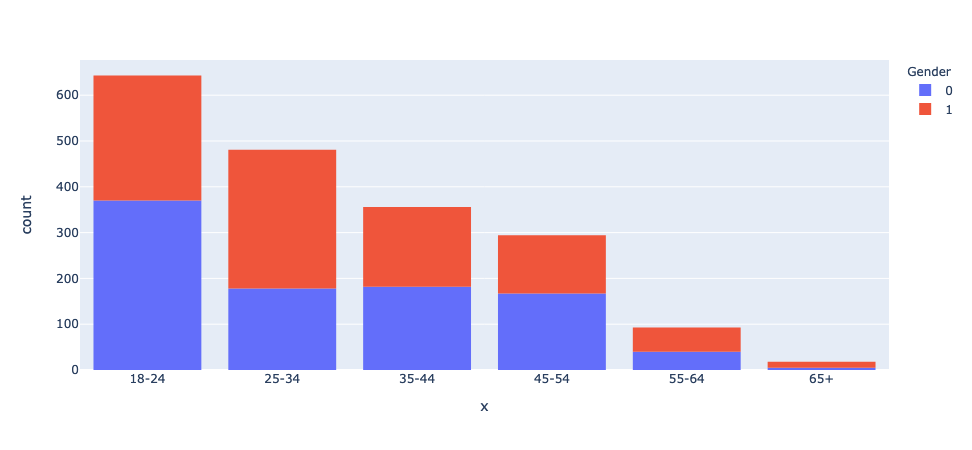

In [65]:
px.histogram(df, x=df.Age.sort_values(), color="Gender")

# Make education column categorical

In [66]:
def education(e):
    if e == -2.43591:
        return 'before_16'
    elif e == -1.73790:
        return 'at_16'
    elif e == -1.43719:
        return 'at_17'
    elif e == -1.22751:
        return 'at_18'
    elif e == -0.61113:
        return 'some_college'
    elif e == -0.05921:
        return 'diploma'
    elif e == 0.45468:
        return 'university_degree'
    elif e == 1.16365:
        return 'masters_degree'
    else:
        return 'doctorate degree'
df['Education'] = df['Education'].apply(education)

In [67]:
df.Education

0                 diploma
1        doctorate degree
2                 diploma
3          masters_degree
4        doctorate degree
              ...        
1880         some_college
1881         some_college
1882    university_degree
1883         some_college
1884         some_college
Name: Education, Length: 1885, dtype: object

# Make ethnicity column categorical

In [68]:
def ethnicity_transform(e):
    if e==-0.50212:
        return "asian"
    elif e==-1.10702:
        return "black"
    elif e==1.90725:
        return "black-asian"
    elif e==0.12600:
        return "white-asian"
    elif e==-0.22166:
        return "white-black"
    elif e==0.11440:
        return "other"
    elif e==-0.31685:
        return "white"

In [69]:
df.Ethnicity = df.Ethnicity.apply(ethnicity_transform)

In [70]:
df.Ethnicity

0       white-asian
1             white
2             white
3             white
4             white
           ...     
1880          white
1881          white
1882          white
1883          white
1884          white
Name: Ethnicity, Length: 1885, dtype: object

# Make country column categorical

In [71]:
def country(c):
    if c == -0.09765:
        return 'australia'
    elif c == 0.24923:
        return 'canada'
    elif c == -0.46841:
        return 'new_zealand'
    elif c == -0.28519:
        return 'other'
    elif c == 0.21128:
        return 'republic_of_ireland'
    elif c == 0.96082:
        return 'uk'
    elif c == -0.57009:
        return 'usa'

df['Country'] = df['Country'].apply(country)

# Binarize drug column

In [72]:
drugs = df.columns[13:]
drugs_bin = [drug + '_bin' for drug in drugs]
def users(u):
    if u == 0 or u == 1:
        return 0
    else:
        return 1

In [73]:
for i in range(len(drugs)):
    df[drugs_bin[i]] = df[drugs[i]].apply(users)

In [74]:
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA,Alcohol_bin,Amphet_bin,Amyl_bin,Benzos_bin,Caff_bin,Cannabis_bin,Choc_bin,Coke_bin,Crack_bin,Ecstasy_bin,Heroin_bin,Ketamine_bin,Legalh_bin,LSD_bin,Meth_bin,Shrooms_bin,Nicotine_bin,Semer_bin,VSA_bin
0,1,35-44,0,diploma,uk,white-asian,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,5,2,0,2,6,0,5,0,0,0,0,0,0,0,0,0,2,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,2,25-34,1,doctorate degree,uk,white,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,5,2,2,0,6,4,6,3,0,4,0,2,0,2,3,0,4,0,0,1,1,1,0,1,1,1,1,0,1,0,1,0,1,1,0,1,0,0
2,3,35-44,1,diploma,uk,white,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,6,0,0,0,6,3,4,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,18-24,0,masters_degree,uk,white,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,4,0,0,3,5,2,4,2,0,0,0,2,0,0,0,0,2,0,0,1,0,0,1,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0
4,5,35-44,0,doctorate degree,uk,white,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,4,1,1,0,6,3,6,0,0,1,0,0,1,0,0,2,2,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0


# Kick entries with Serum > 0 and drop IDs

In [75]:
df.query("Semer == 0", inplace=True)

In [76]:
df.drop("Semer", axis=1, inplace=True)
df.drop("Semer_bin", axis=1, inplace=True)

In [77]:
df.drop("ID", axis=1, inplace=True)

# Create Dummies for Age, Education, Country and Ethnicity

In [78]:
df = df.merge(pd.get_dummies(df.Age, drop_first=True, prefix="age"), left_index=True, right_index=True)
df.drop("Age", axis=1, inplace=True)

In [79]:
df = df.merge(pd.get_dummies(df.Education, drop_first=True, prefix="edu"), left_index=True, right_index=True)
df.drop("Education", axis=1, inplace=True)

In [80]:
df = df.merge(pd.get_dummies(df.Country, drop_first=True, prefix="country"), left_index=True, right_index=True)
df.drop("Country", axis=1, inplace=True)

In [81]:
df = df.merge(pd.get_dummies(df.Ethnicity, drop_first=True, prefix="ethn"), left_index=True, right_index=True)
df.drop("Ethnicity", axis=1, inplace=True)

In [82]:
df.head()

,Gender,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,VSA,Alcohol_bin,Amphet_bin,Amyl_bin,Benzos_bin,Caff_bin,Cannabis_bin,Choc_bin,Coke_bin,Crack_bin,Ecstasy_bin,Heroin_bin,Ketamine_bin,Legalh_bin,LSD_bin,Meth_bin,Shrooms_bin,Nicotine_bin,VSA_bin,age_25-34,age_35-44,age_45-54,age_55-64,age_65+,edu_at_17,edu_at_18,edu_before_16,edu_diploma,edu_doctorate degree,edu_masters_degree,edu_some_college,edu_university_degree,country_canada,country_new_zealand,country_other,country_republic_of_ireland,country_uk,country_usa,ethn_black,ethn_black-asian,ethn_other,ethn_white,ethn_white-asian,ethn_white-black
0,0,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,5,2,0,2,6,0,5,0,0,0,0,0,0,0,0,0,2,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,1,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,5,2,2,0,6,4,6,3,0,4,0,2,0,2,3,0,4,0,1,1,1,0,1,1,1,1,0,1,0,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,1,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,6,0,0,0,6,3,4,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,0,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,4,0,0,3,5,2,4,2,0,0,0,2,0,0,0,0,2,0,1,0,0,1,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,0,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,4,1,1,0,6,3,6,0,0,1,0,0,1,0,0,2,2,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


# Feature Selection for Modeling

In [83]:
features = df.columns.tolist()[:8] + df.columns.tolist()[44:]

In [88]:
X = df[features]

,Gender,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,age_25-34,age_35-44,age_45-54,age_55-64,age_65+,edu_at_17,edu_at_18,edu_before_16,edu_diploma,edu_doctorate degree,edu_masters_degree,edu_some_college,edu_university_degree,country_canada,country_new_zealand,country_other,country_republic_of_ireland,country_uk,country_usa,ethn_black,ethn_black-asian,ethn_other,ethn_white,ethn_white-asian,ethn_white-black
0,0,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,1,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,1,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,0,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,0,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,0,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
1881,1,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
1882,0,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
1883,0,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0


In [125]:
y = df[df.columns.tolist()[8:26]]
#y = y.Alcohol

In [108]:
df_train, df_test = train_test_split(df, random_state=1, test_size=0.2, stratify=y)

# First Model KNN

In [111]:
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier

In [113]:
knn = KNeighborsClassifier(n_neighbors=, metric='euclidean')             
scores = cross_validate(knn, X, y, cv=5, return_train_score=True)

In [114]:
scores

{'fit_time': array([0.00632501, 0.0020721 , 0.00274897, 0.00227308, 0.00230193]),
 'score_time': array([0.03185391, 0.02358913, 0.02643919, 0.027318  , 0.03073001]),
 'test_score': array([0.28723404, 0.33510638, 0.32      , 0.29066667, 0.32      ]),
 'train_score': array([0.52631579, 0.52764823, 0.54061252, 0.53328895, 0.55259654])}

In [129]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV

#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}

#Instantiating the model knn
knn = KNeighborsClassifier()

In [130]:
knn_cv.best_score_

0.40973421926910303

In [147]:
best_scores = {}
for f in y:
    X_train, X_test, y_train, y_test = train_test_split(X, df[f], test_size=0.2, random_state=1, stratify=df[f])
    scoring = ['precision_macro', 'recall_macro', 'accuracy', 'f1_macro']
    scores = cross_validate(knn, X_train, y_train, scoring=scoring, cv=5, return_train_score=True)
    best_scores[f]= scores

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/model_selection/_split.py:672: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/envs/nf/lib/python3.6/site-

In [148]:
best_scores['Alcohol']

{'fit_time': array([0.00462008, 0.00199413, 0.00183511, 0.00195408, 0.0019598 ]),
 'score_time': array([0.06057906, 0.02721786, 0.02472997, 0.02388787, 0.02371812]),
 'test_precision_macro': array([0.19990844, 0.15211086, 0.12502359, 0.15874336, 0.14273744]),
 'train_precision_macro': array([0.42250258, 0.39879211, 0.43156861, 0.40694611, 0.46816856]),
 'test_recall_macro': array([0.18684276, 0.15414644, 0.1348862 , 0.15811026, 0.14517218]),
 'train_recall_macro': array([0.34077392, 0.35741696, 0.35183747, 0.34212392, 0.39667107]),
 'test_accuracy': array([0.33887043, 0.33333333, 0.29333333, 0.30666667, 0.33      ]),
 'train_accuracy': array([0.54083333, 0.52373022, 0.53621982, 0.52289759, 0.54371357]),
 'test_f1_macro': array([0.18994823, 0.14736175, 0.12802503, 0.15682703, 0.1396786 ]),
 'train_f1_macro': array([0.3617025 , 0.37215422, 0.37285199, 0.36225908, 0.41895177])}